<a href="https://colab.research.google.com/github/AftabUdaipurwala/Deeplearning/blob/main/Deep_Learning_Implement_Neural_Network_In_Python_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy
import pandas as pd
import numpy as np
from sklearn import linear_model
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras



In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/MyDrive/py-master/DeepLearningML/7_nn_from_scratch'

7_neural_network_from_scratch.ipynb  insurance_data.csv  nn.jpg


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/py-master/DeepLearningML/7_nn_from_scratch/insurance_data.csv')
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [ ]:
# scaling the data for preprocessing 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['age','affordibility']], df.bought_insurance, test_size=0.2, random_state=123)

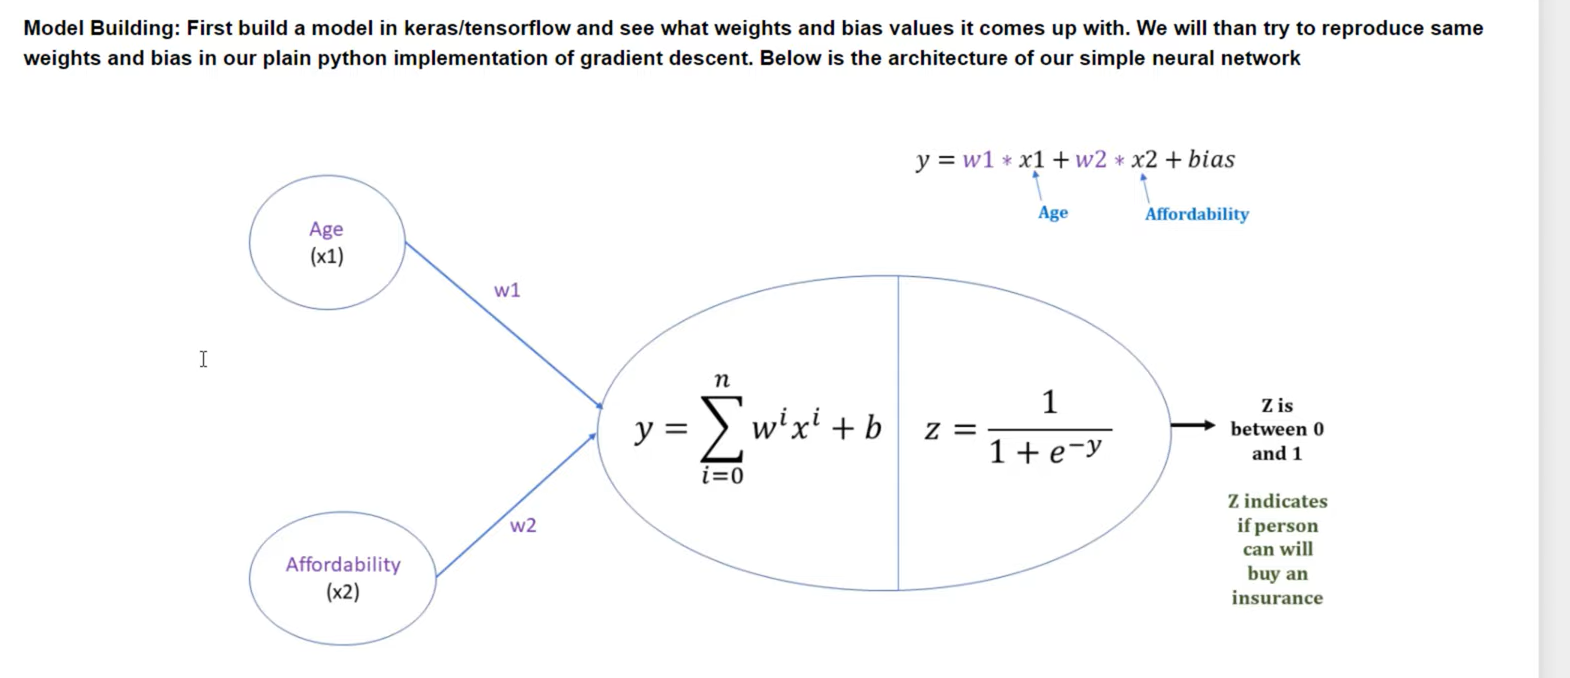

In [ ]:
# scaling age to improve the machine learning model performance
x_train_scaled = x_train.copy()
x_train_scaled.age = x_train_scaled['age']/100
x_test_scaled = x_test.copy()
x_test_scaled.age = x_test_scaled['age']/100

In [14]:
# trying to build the model using simple neural netwrok
# Kernal_initializer is for initializing weights (i.e. m in y=mx+c) and  bias_initializer is for initializing bias (i.e. C in y=mx+c)
model = keras.Sequential([
                          keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(
    optimizer ='adam',
    loss ='binary_crossentropy',
    metrics =['accuracy']
)

model.fit(x_train_scaled,y_train, epochs=5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 20ms/step - loss: 0.5420 - accuracy: 0.9091
Epoch 2502/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5419 - accuracy: 0.9091
Epoch 2503/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5419 - accuracy: 0.9091
Epoch 2504/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5419 - accuracy: 0.9091
Epoch 2505/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5418 - accuracy: 0.9091
Epoch 2506/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5418 - accuracy: 0.9091
Epoch 2507/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5417 - accuracy: 0.9091
Epoch 2508/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5417 - accuracy: 0.9091
Epoch 2509/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5417 - accuracy: 0.9091
Epoch 2510/5000
1/1 [==============================] 

In [15]:
model.evaluate(x_test_scaled, y_test) # checking model on test data

1/1 [==============================] - 0s 467ms/step - loss: 0.4896 - accuracy: 0.8333


[0.48964834213256836, 0.8333333134651184]

In [16]:
coef,intercept = model.get_weights() # checking weights n bais final values
coef, intercept

(array([[3.9699857],
        [1.6556505]], dtype=float32), array([-2.9109623], dtype=float32))

In [17]:
# building model from scratch in python
def sigmoid(x):
  import math
  return 1/(1+math.exp(-x))
  

In [18]:
def prediction_function(age, affordibility):
  weighted_sum = coef[0]*age+coef[1]*affordibility + intercept
  return sigmoid(weighted_sum)


In [19]:
def log_loss(y_true,y_predicted):
  epsilon = 1e-15
  y_predicted_new = [max(i,epsilon) for i in y_predicted]
  y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
  y_predicted_new = np.array(y_predicted_new)
  return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [20]:
# Making sigmoid function using numpy for faster calculation purposes
def sigmoid_numpy(x):
  return 1/(1+np.exp(-x))

sigmoid_numpy(np.array([12,0,1]))
  

array([0.99999386, 0.5       , 0.73105858])

In [35]:
# creating the class for neural network
class myNN:
  def __init__(self):
    self.w1=1
    self.w2=1
    self.bias=0

    # define gradiant descent function
  def fit(self, x,y,epochs, loss_threshold):
    self.w1,self.w2,self.bias= self.gradiant_descent(x['age'], x.affordibility,y, epochs, loss_threshold)

  def predict(self, x_test):
    weighted_sum= self.w1*x_test['age']+self.w2*x_test['affordibility']+self.bias
    return sigmoid_numpy(weighted_sum)


  def gradiant_descent(self,age,affordibility,y_true,epochs,loss_threshold):
    # w1,w2,bias
    w1=w2=1
    bias =0
    rate =0.5
    n= len(age)

    for i in range(epochs):
      weighted_sum= w1*age+w2*affordibility+bias
      y_predicted = sigmoid_numpy(weighted_sum)
      loss = log_loss(y_true,y_predicted)
      w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
      w2d = (1/n)*np.dot(np.transpose(affordibility),(y_predicted-y_true))
      bias_d = np.mean(y_predicted-y_true)
      w1 = w1-rate*w1d
      w2 = w2-rate*w2d
      bias = bias-rate*bias_d
      if i%50==0:
        print(f'Epoch: {i}, w1:{w1} w2:{w2} bias:{bias}, loss{loss}')

      if loss<=loss_threshold:
        print(f'Epoch: {i}, w1:{w1} w2:{w2} bias:{bias}, loss{loss}')
        break

    return w1, w2, bias



In [36]:
custommodel= myNN() # running the model in my custom class
custommodel.fit(x_train_scaled,y_train,epochs=8000, loss_threshold=0.4621)

Epoch: 0, w1:0.96118696347786 w2:0.9273184171082597 bias:-0.15533429441307403, loss0.7871362376444705
Epoch: 50, w1:1.312529544923476 w2:1.2265041471914648 bias:-1.5705871610341542, loss0.5450612295546974
Epoch: 100, w1:1.904356322914151 w2:1.5513372412437054 bias:-2.061584821284427, loss0.516614105780249
Epoch: 150, w1:2.4714887168172193 w2:1.709027481487007 bias:-2.410904613654068, loss0.4977129783968964
Epoch: 200, w1:3.002548116767035 w2:1.7917449492779018 bias:-2.6849482537003952, loss0.48308175916068047
Epoch: 250, w1:3.4947309743670987 w2:1.8382532329903722 bias:-2.913844348748763, loss0.4711639609322894
Epoch: 296, w1:3.913783830368863 w2:1.8648804072891627 bias:-3.0978672275197283, loss0.46199528988414945


In [37]:
custommodel.predict(x_test_scaled)

24    0.673466
5     0.722868
7     0.320909
8     0.767377
25    0.706917
11    0.465772
dtype: float64

In [38]:
model.predict(x_test_scaled)

array([[0.67473525],
       [0.72469676],
       [0.37075698],
       [0.7696045 ],
       [0.70857644],
       [0.46413276]], dtype=float32)